## Credit Crad Fault Detection PW

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preprocessing:

In [2]:
df=pd.read_csv("C:\\Users\\rajee\\Desktop\\DS\\PW\\DATA\\UCI_Credit_Card.csv")
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
df.shape

(30000, 25)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

## EDA-Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
#number of non-null records in each column
df.count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default.payment.next.month    30000
dtype: int64

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

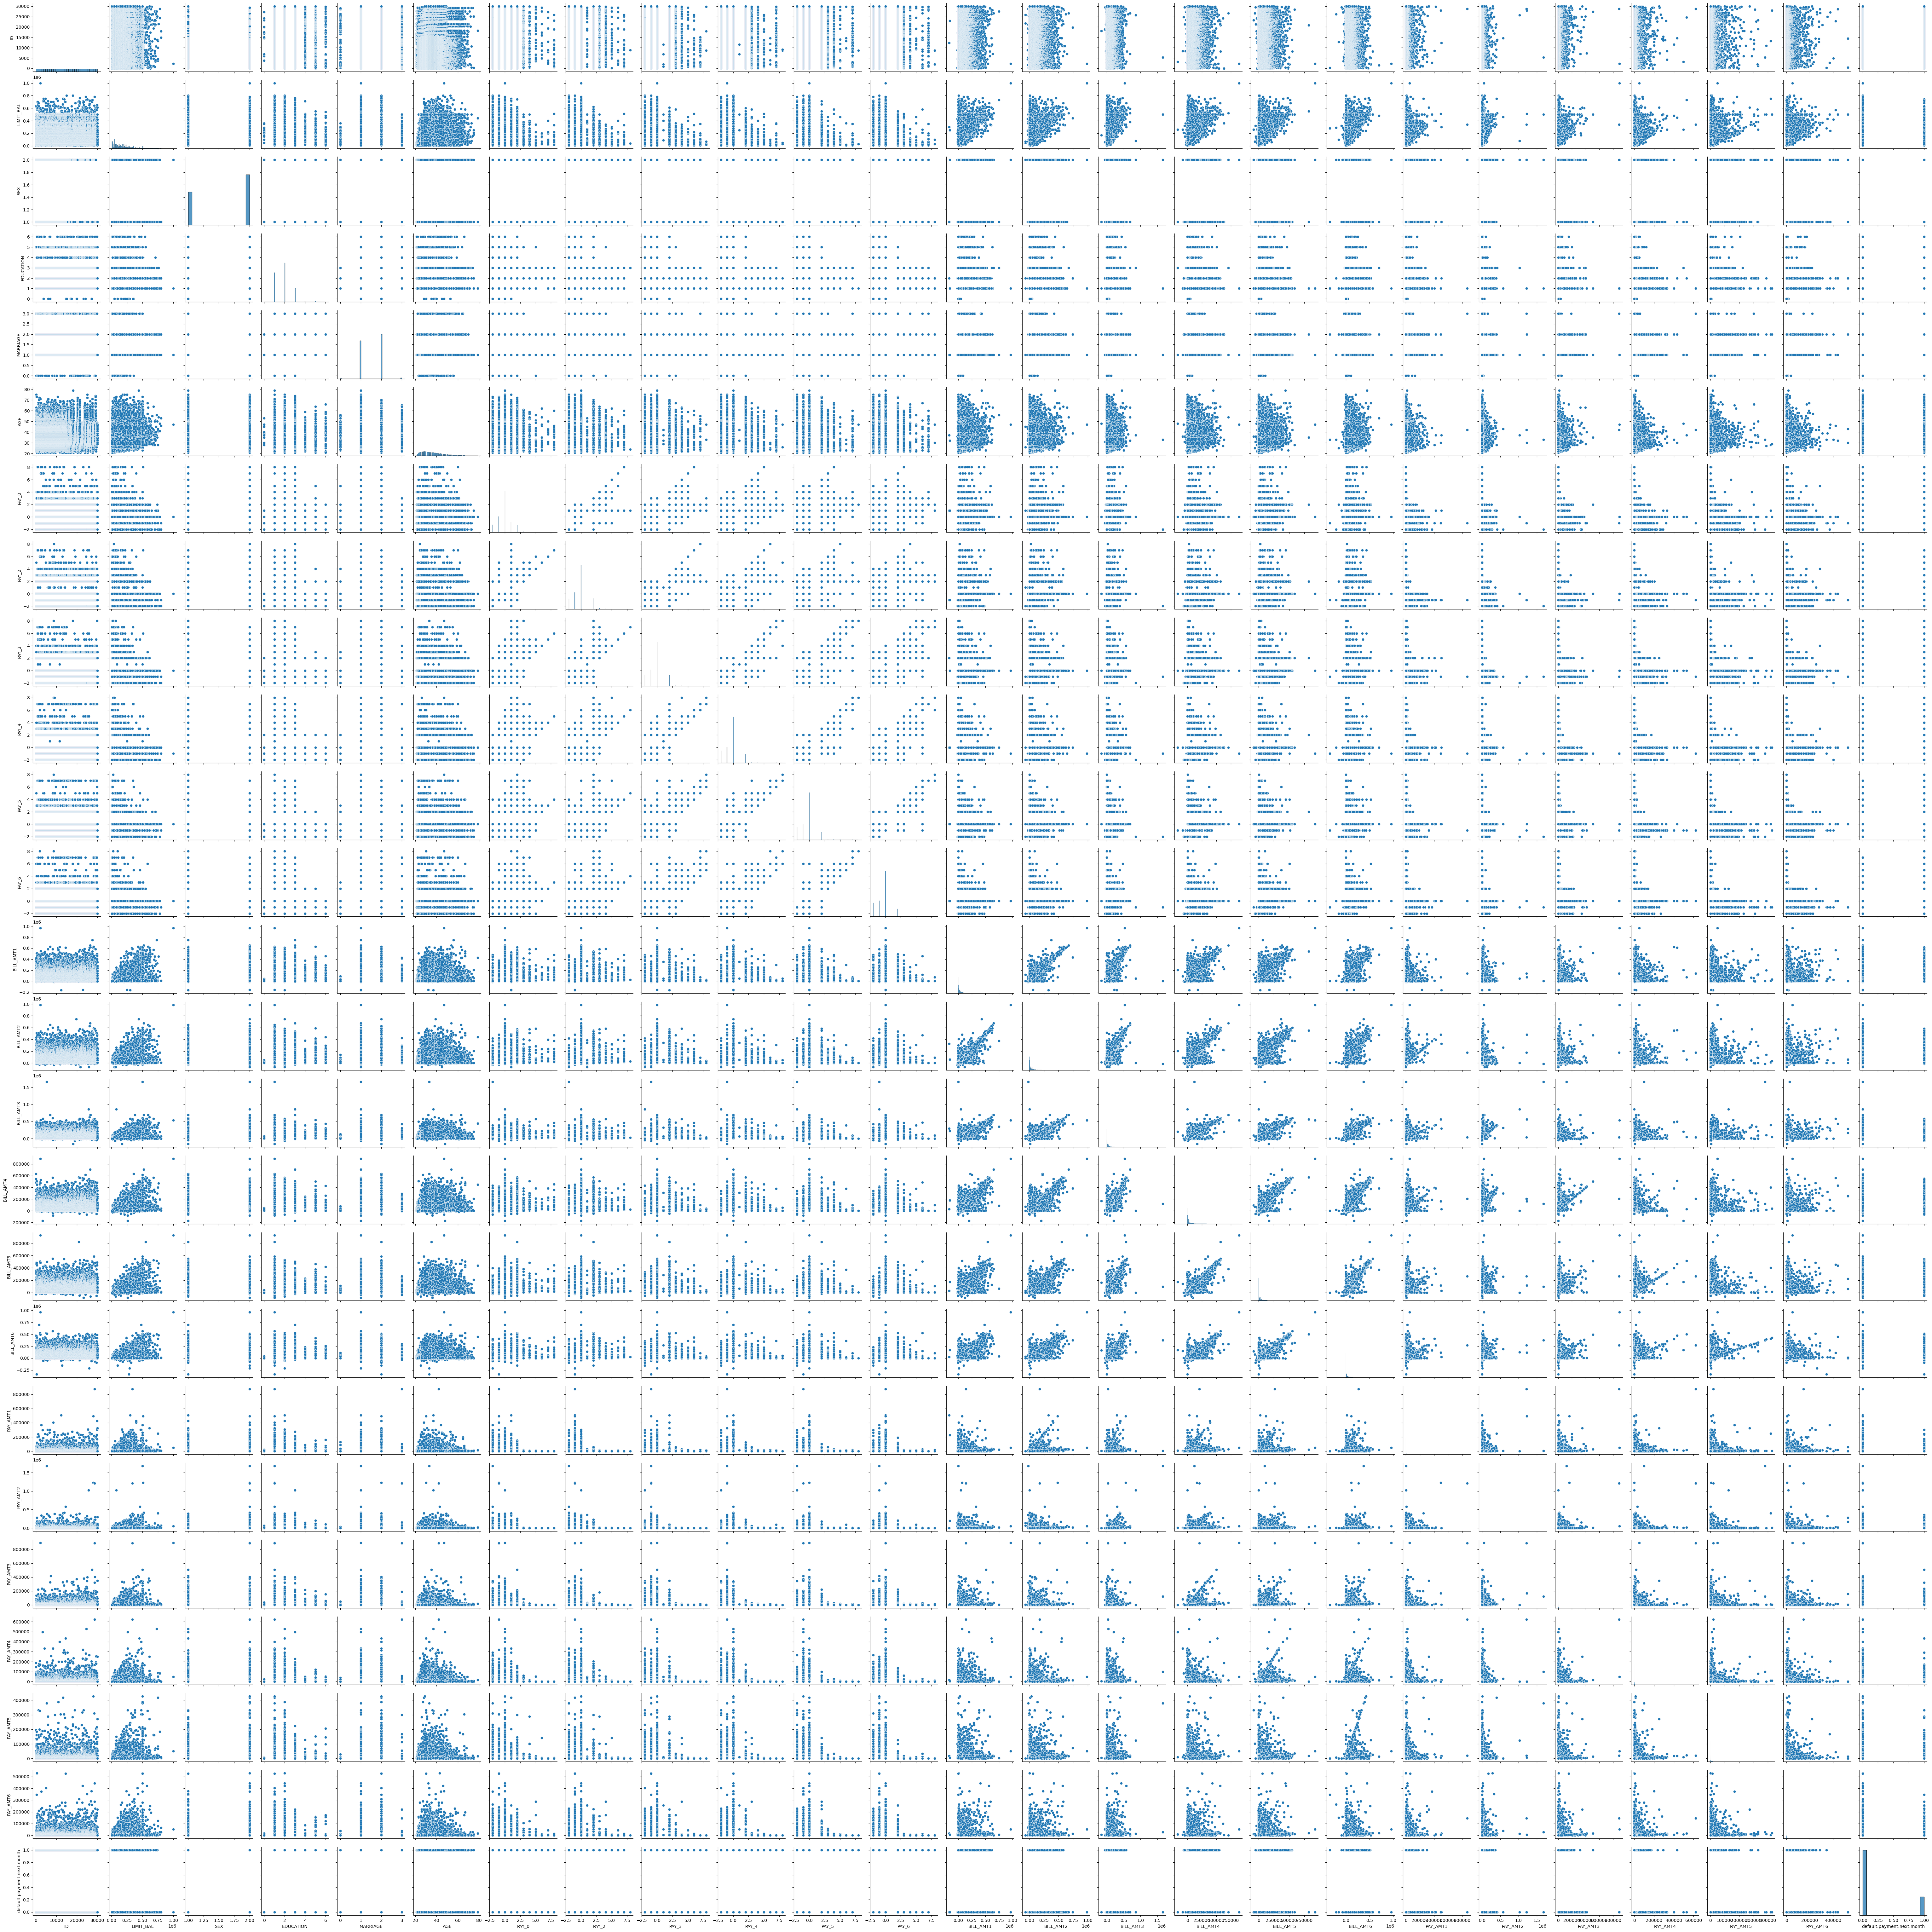

In [8]:
sns.pairplot(df)

In [9]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [10]:
!pip install pandas-profiling

     ------------------------------------ 324.4/324.4 kB 875.0 kB/s eta 0:00:00
     ------------------------------------ 353.0/353.0 kB 812.2 kB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 663.5/663.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 4.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=fa8455f4f01a39fa165640875bccf24d837a44512aa77226f3e784efb8a2cc6c
  Stored in directory: c:\users\rajee\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [11]:
from pandas_profiling import ProfileReport

In [12]:
profile=ProfileReport(df,title="pandas profiling report")

In [13]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
X=df.drop(labels=["default.payment.next.month"],axis=1)
X

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         -1  ...      689.0        0.0        0.0        0.0       0.0   
1          0  ...     2682.0     3272.0     3455.0     3261.0       0.0   
2          0  ...    13559.0    14331.0    14948.0    15549.0    1518.0   
3          0  ...    49291.0    28314.0    28959.0    29547.0    2000.0   
4          0  ...    35835.0    20940.0    19146.0    19131.0    2000.0   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...   208365.0    88004.0    31237.0    15980.0    8500.0   
29996     -1  ...     3502.0     8979.0     5190.0        0.0    1837.0   
29997     -1  ...     2758.0    20878.0    20582.0    19357.0       0.0   
29998      0  ...    76304.0    52774.0    11855.0    48944.0   85900.0   
29999      0  ...    49764.0    36535.0    32428.0    15313.0    2078.0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         689.0       0.0       0.0       0.0       0.0  
1        1000.0    1000.0    1000.0       0.0    2000.0  
2        1500.0    1000.0    1000.0    1000.0    5000.0  
3        2019.0    1200.0    1100.0    1069.0    1000.0  
4       36681.0   10000.0    9000.0     689.0     679.0  
...         ...       ...       ...       ...       ...  
29995   20000.0    5003.0    3047.0    5000.0    1000.0  
29996    3526.0    8998.0     129.0       0.0       0.0  
29997       0.0   22000.0    4200.0    2000.0    3100.0  
29998    3409.0    1178.0    1926.0   52964.0    1804.0  
29999    1800.0    1430.0    1000.0    1000.0    1000.0  

[30000 rows x 24 columns]

In [15]:
y=df["default.payment.next.month"]

In [16]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [18]:
X_train

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
13732  13733   500000.0    2          1         1   32     -1     -1     -1   
17857  17858   140000.0    1          1         2   25      0      0      0   
15350  15351    50000.0    2          3         3   37      2      2      2   
6576    6577   300000.0    1          3         1   31     -1     -1     -1   
29789  29790   310000.0    1          2         2   35      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
23452  23453   280000.0    2          2         1   34     -2     -2     -2   
23775  23776    30000.0    2          2         2   50      0      0      0   
4367    4368    50000.0    2          2         1   25      0      0      0   
27098  27099   500000.0    1          1         1   43      1     -2     -2   
15715  15716   270000.0    1          1         1   39     -2     -2     -2   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
13732     -1  ...        0.0   282562.0   288459.0   293233.0   10573.0   
17857      0  ...    96820.0    97000.0    97467.0    79872.0    3500.0   
15350      2  ...    49325.0    48033.0    27019.0    26450.0    2300.0   
6576      -1  ...        0.0      462.0        0.0     3069.0    2500.0   
29789      0  ...   269351.0   276873.0   281764.0   299161.0   10000.0   
...      ...  ...        ...        ...        ...        ...       ...   
23452     -2  ...    11966.0     5844.0     8994.0    14631.0    6439.0   
23775      0  ...    24084.0    23631.0    29863.0    29369.0    1389.0   
4367       0  ...    50630.0    30192.0    30297.0    28541.0    2082.0   
27098     -2  ...        0.0        0.0      177.0     4716.0       0.0   
15715     -2  ...    15332.0     9094.0   225604.0     7443.0       0.0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
13732       0.0  282562.0   11000.0    9572.0    8928.0  
17857    4790.0    3092.0    3148.0    2981.0    3912.0  
15350    1500.0       0.0    3400.0       0.0    1200.0  
6576        0.0     462.0       0.0    3069.0     280.0  
29789    9775.0   12000.0   11000.0   22000.0    9905.0  
...         ...       ...       ...       ...       ...  
23452   12042.0    5844.0    4672.0   14724.0    4429.0  
23775    1602.0    1563.0    8500.0    1100.0     500.0  
4367     1726.0    1013.0    1061.0    1135.0     886.0  
27098       0.0       0.0     177.0    4716.0    1000.0  
15715    3119.0    9124.0  225616.0    7443.0   69550.0  

[22500 rows x 24 columns]

In [23]:
from sklearn.preprocessing import StandardScaler
# train_scaler=StandardScaler()
# test_scaler=StandardScaler()
scaler=StandardScaler()

In [24]:
scaled_train=train_scaler.fit_transform(X_train)
scaled_test=test_scaler.transform(X_test)

In [25]:
scaled_data=train_scaler.fit_transform(df)
scaled_data

array([[-1.73199307, -1.13672015,  0.81016074, ..., -0.31413612,
        -0.29338206,  1.87637834],
       [-1.7318776 , -0.3659805 ,  0.81016074, ..., -0.31413612,
        -0.18087821,  1.87637834],
       [-1.73176213, -0.59720239,  0.81016074, ..., -0.24868274,
        -0.01212243, -0.53294156],
       ...,
       [ 1.73176213, -1.05964618, -1.23432296, ..., -0.18322937,
        -0.11900109,  1.87637834],
       [ 1.7318776 , -0.67427636, -1.23432296, ...,  3.15253642,
        -0.19190359,  1.87637834],
       [ 1.73199307, -0.90549825, -1.23432296, ..., -0.24868274,
        -0.23713013,  1.87637834]])

**GaussianNB**

In [28]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(scaled_train,y_train)

GaussianNB()

In [29]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(scaled_test)
accuracy_score(y_test,y_pred)*100

70.90666666666667

In [30]:
param_grid={"var_smoothing":[0.1,0.001,0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [33]:
gs=GridSearchCV(clf,param_grid=param_grid, cv=5, verbose=3)
gs.fit(scaled_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.629 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.704 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.773 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.757 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.770 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.536 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.616 total time=   0.0s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.753 total time=   0.0s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.736 total time=   0.0s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.738 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.782 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.001, 0.5, 0.05, 0.01, 1e-08,
                                           1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [34]:
gs.best_params_

{'var_smoothing': 0.5}

In [37]:
clf1=GaussianNB(var_smoothing=0.5)
clf1.fit(scaled_train,y_train)
y_pred1=clf1.predict(scaled_test)
accuracy_score(y_test,y_pred1)*100

78.53333333333333

**RandomForestClassifier**

In [39]:
from sklearn.ensemble import RandomForestClassifier
rs=RandomForestClassifier()
rs.fit(scaled_train,y_train)
y_pred2=rs.predict(scaled_test)
accuracy_score(y_test,y_pred2)*100

81.56

In [40]:
param_grid_rf={ "n_estimators":[50,100,130],
                 "max_depth":range(3,11,1),
                 "random_state":[0,50,100]
    
               }

In [41]:
gs1=GridSearchCV(rs,param_grid=param_grid_rf, cv=5, verbose=3)
gs1.fit(scaled_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=3, n_estimators=50, random_state=0;, score=0.808 total time=   1.8s
[CV 2/5] END max_depth=3, n_estimators=50, random_state=0;, score=0.810 total time=   1.5s
[CV 3/5] END max_depth=3, n_estimators=50, random_state=0;, score=0.811 total time=   1.4s
[CV 4/5] END max_depth=3, n_estimators=50, random_state=0;, score=0.806 total time=   1.5s
[CV 5/5] END max_depth=3, n_estimators=50, random_state=0;, score=0.808 total time=   1.6s
[CV 1/5] END max_depth=3, n_estimators=50, random_state=50;, score=0.806 total time=   1.4s
[CV 2/5] END max_depth=3, n_estimators=50, random_state=50;, score=0.809 total time=   1.4s
[CV 3/5] END max_depth=3, n_estimators=50, random_state=50;, score=0.809 total time=   1.4s
[CV 4/5] END max_depth=3, n_estimators=50, random_state=50;, score=0.803 total time=   1.4s
[CV 5/5] END max_depth=3, n_estimators=50, random_state=50;, score=0.806 total time=   1.3s
[CV 1/5] END max_depth=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [42]:
gs1.best_params_

{'max_depth': 7, 'n_estimators': 130, 'random_state': 50}

In [43]:
rs1=RandomForestClassifier(criterion='gini', max_depth=10,n_estimators=100,random_state=0)
rs1.fit(scaled_train,y_train)
y_pred3=rs1.predict(scaled_test)
accuracy_score(y_test,y_pred3)*100

81.90666666666667

**XGB_Classifier**

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(scaled_train,y_train)
y_pred4=xgb.predict(scaled_test)
accuracy_score=(y_test,y_pred4)*100

In [48]:
accuracy_score

(4455     0
 670      0
 8994     0
 16732    0
 21985    1
         ..
 9087     0
 5956     0
 12490    1
 27949    0
 23473    0
 Name: default.payment.next.month, Length: 7500, dtype: int64,
 array([0, 0, 1, ..., 0, 0, 0]),
 4455     0
 670      0
 8994     0
 16732    0
 21985    1
         ..
 9087     0
 5956     0
 12490    1
 27949    0
 23473    0
 Name: default.payment.next.month, Length: 7500, dtype: int64,
 array([0, 0, 1, ..., 0, 0, 0]),
 4455     0
 670      0
 8994     0
 16732    0
 21985    1
         ..
 9087     0
 5956     0
 12490    1
 27949    0
 23473    0
 Name: default.payment.next.month, Length: 7500, dtype: int64,
 array([0, 0, 1, ..., 0, 0, 0]),
 4455     0
 670      0
 8994     0
 16732    0
 21985    1
         ..
 9087     0
 5956     0
 12490    1
 27949    0
 23473    0
 Name: default.payment.next.month, Length: 7500, dtype: int64,
 array([0, 0, 1, ..., 0, 0, 0]),
 4455     0
 670      0
 8994     0
 16732    0
 21985    1
         ..
 9087     0
 595

In [ ]:
sunny.savita@pw.live